In [458]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import math as mt

In [459]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression
from typing import List
from typing import Tuple
from sklearn import tree

In [460]:
diamond_df = pd.read_csv("diamond_sorted.csv")
diamond_df.head()

,Unnamed: 0,carat,depth,table,price,x,y,z,cut_Good,cut_Ideal,...,color_H,color_I,color_J,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2
0,1,0,61,55,326,3,3,2,0,1,...,0,0,0,0,0,1,0,0,0,0
1,2,0,59,61,326,3,3,2,0,0,...,0,0,0,0,1,0,0,0,0,0
2,3,0,56,65,327,4,4,2,1,0,...,0,0,0,0,0,0,1,0,0,0
3,4,0,62,58,334,4,4,2,0,0,...,0,1,0,0,0,0,0,1,0,0
4,5,0,63,58,335,4,4,2,1,0,...,0,0,1,0,0,1,0,0,0,0


In [461]:
def linear_model(ycolumn):

    X = diamond_df.drop(columns=[ycolumn,"Unnamed: 0"])
    y = diamond_df[ycolumn]

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

    lin_reg = LinearRegression()
    lin_reg.fit(X_train, y_train)

    y_pred = lin_reg.predict(X_test)

    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    return mse, r2


In [462]:
mse, r2 = linear_model("price")
print(f'MSE: {mse}, R2: {r2}')

MSE: 2141792.6468459307, R2: 0.8626700641808112


In [470]:
def value_counting(arr):
    return arr.value_counts()

In [472]:
def decision_tree(ycolumn):
    X = diamond_df.drop(columns=[ycolumn,"Unnamed: 0"])
    y = diamond_df[ycolumn]

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
    model =tree.DecisionTreeClassifier(max_depth=9, random_state=42, min_samples_leaf=3)
    model = model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    return mse, r2

In [474]:
mse2, r22 = decision_tree("price")
print(f'MSE: {mse2}, R2: {r22}')

MSE: 2495368.551415153, R2: 0.8399990757668726


In [475]:
def plot_correlation_heatmap(data_preprocessed):
    """Plot correlation heatmap of all features."""
    plt.figure(figsize=(10, 8))
    correlation_matrix = data_preprocessed.corr()
    sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0,
                square=True)
    plt.title('Correlation Heatmap of Features')
    plt.show()


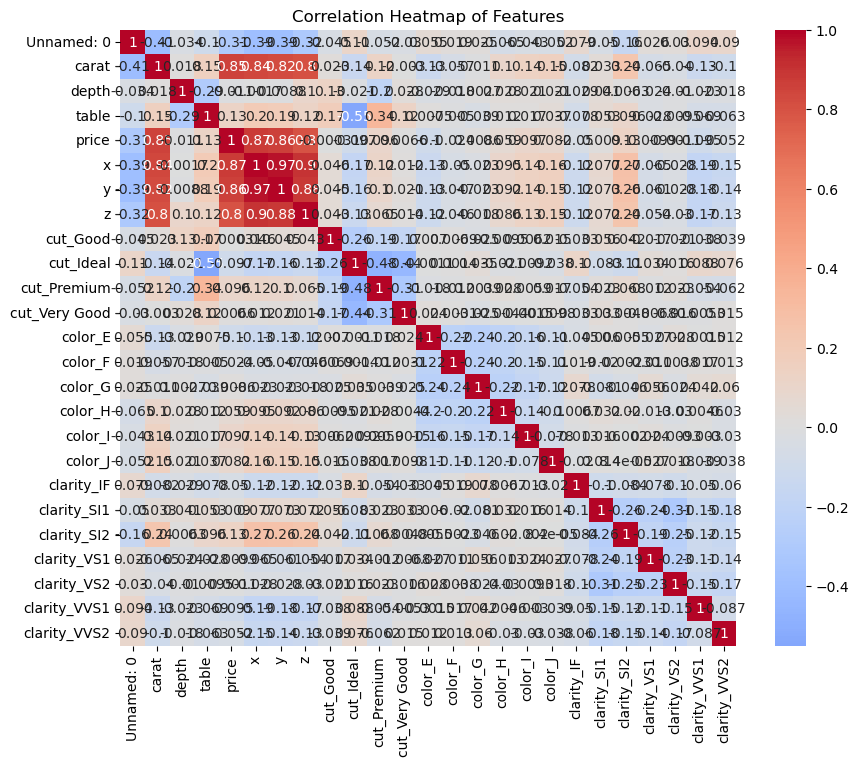

In [478]:
plot_correlation_heatmap(diamond_df)

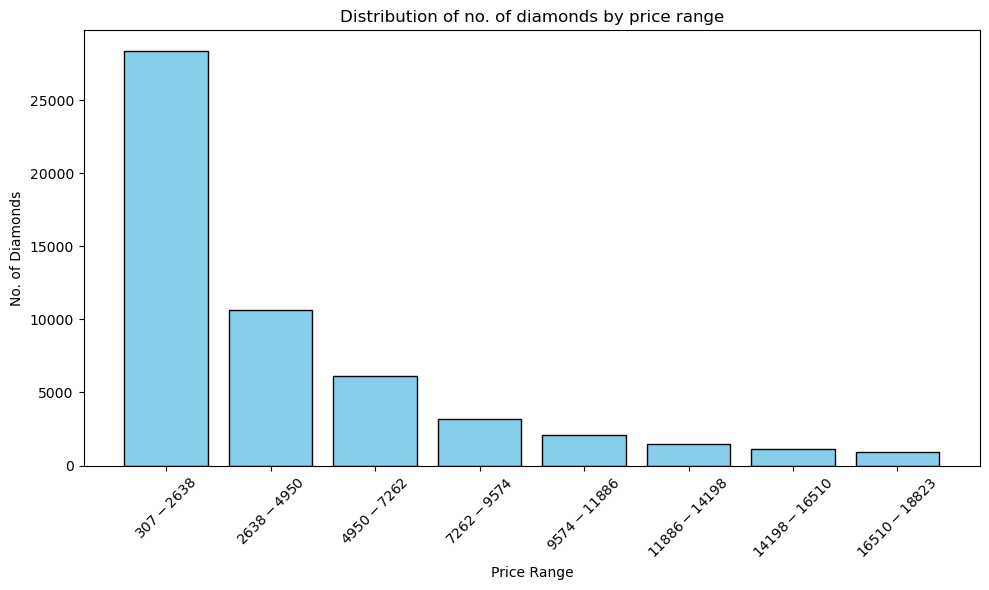

In [524]:
x_price = diamond_df['price'].values
y_carat = diamond_df['carat'].values

price_categories = pd.cut(x_price, bins=8)
price_counts = price_categories.value_counts().sort_index()

plt.figure(figsize=(10,6))
plt.bar(range(len(price_counts)), price_counts.values, color='skyblue', edgecolor='black')
plt.title('Distribution of no. of diamonds by price range')
plt.xlabel('Price Range')
plt.ylabel('No. of Diamonds')

plt.xticks(range(len(price_counts)),
           [f'${int(interval.left)}-${int(interval.right)}'
            for interval in price_counts.index],
           rotation=45)

plt.tight_layout()
plt.show()

In [492]:
depth = diamond_df['depth']
table = diamond_df['table']
price = diamond_df['price']

In [500]:
def create_bins(data, prefix):
    bins = pd.cut(data, bins=5)
    counts = bins.value_counts().sort_index()
    labels = [f'{prefix}: {interval.left:.1f}-{interval.right:.1f}'
                for interval in counts.index]
    return counts, labels

colors = ['lightblue', 'lightgreen', 'pink' , 'yellow','red','orange','lightgray','magenta']

Text(0.5, 1.0, 'Distribution of Diamond Depth')

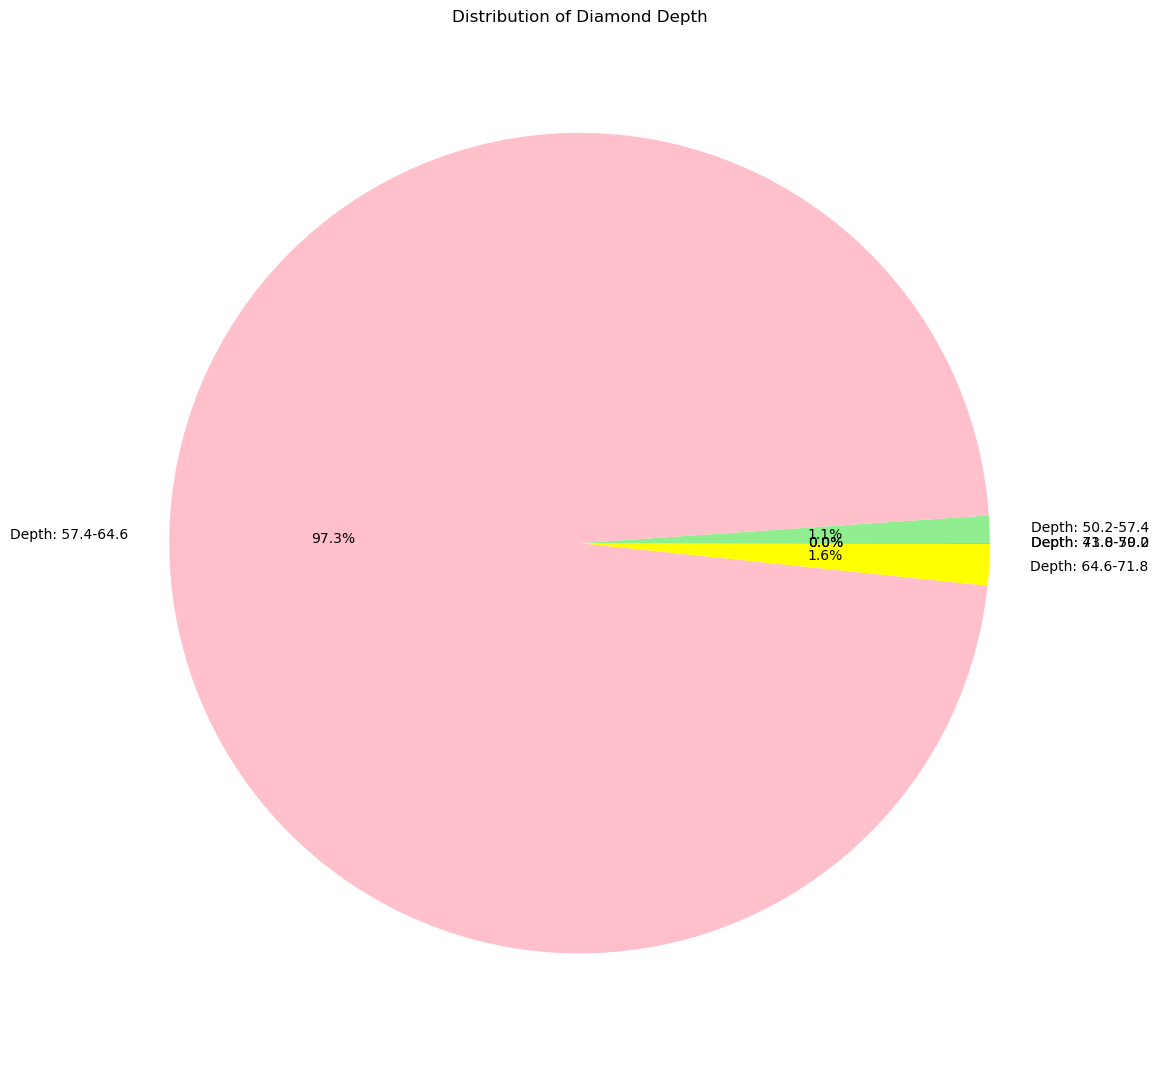

In [512]:
plt.figure(figsize=(45,30))

#Dept pie chart
plt.subplot(1,3,1)
depth_counts, depth_labels = create_bins(depth, 'Depth')
plt.pie(depth_counts, labels=depth_labels, autopct='%1.1f%%',
        colors=colors)
plt.title('Distribution of Diamond Depth')

Text(0.5, 1.0, 'Distribution of Diamond Table')

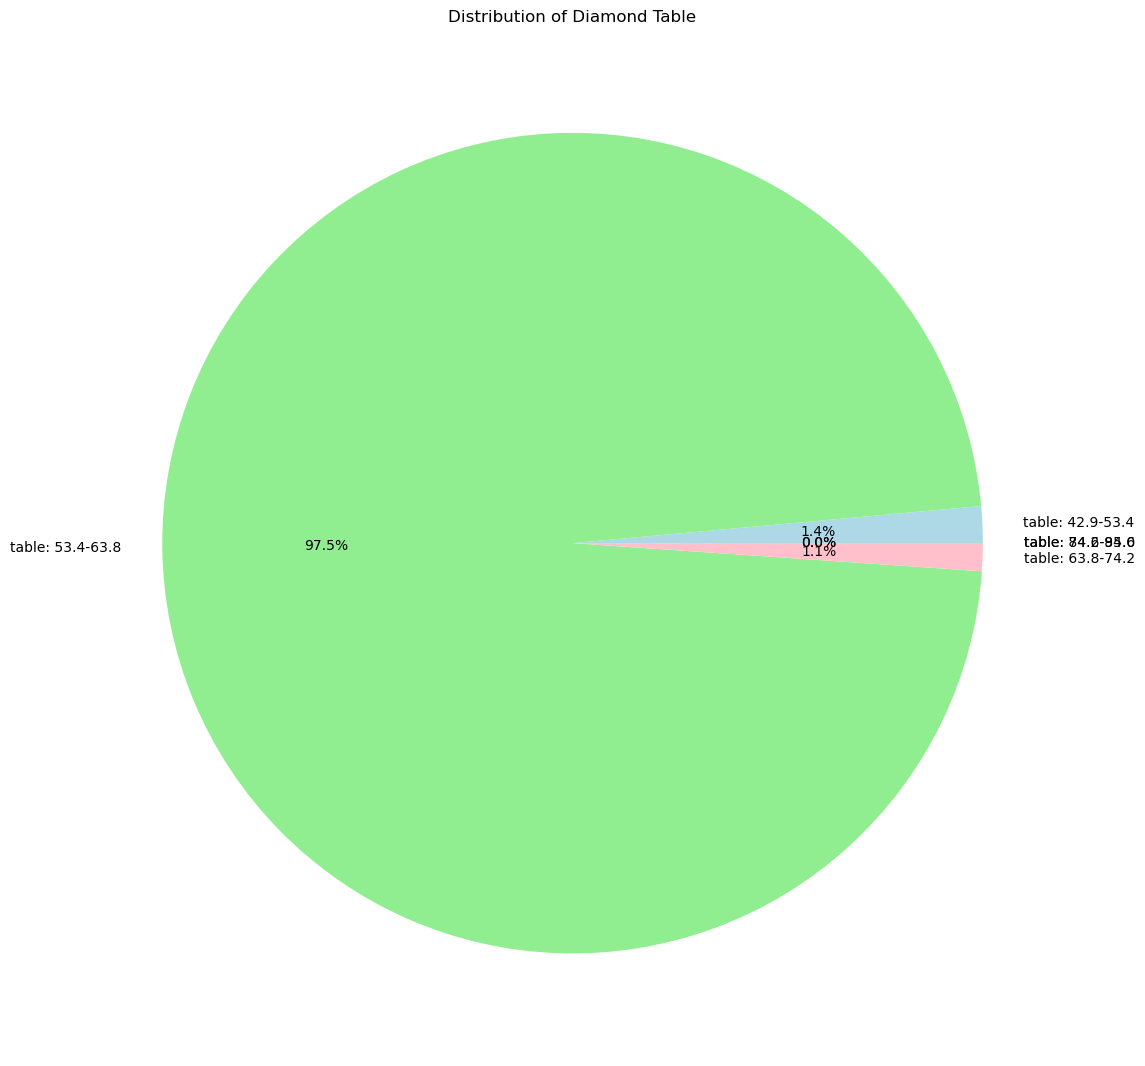

In [516]:
plt.figure(figsize=(45,30))

#Dept pie chart
plt.subplot(1,3,1)
table_counts, table_labels = create_bins(table, 'table')
plt.pie(table_counts, labels=table_labels, autopct='%1.1f%%',
        colors=colors)
plt.title('Distribution of Diamond Table')

Text(0.5, 1.0, 'Distribution of Diamond Price')

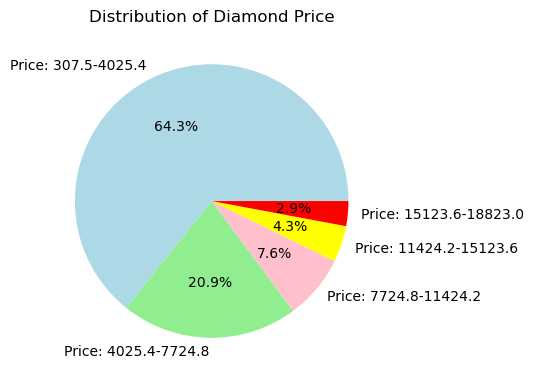

In [522]:
plt.figure(figsize=(15,10))

#Dept pie chart
plt.subplot(1,3,1)
price_counts, price_labels = create_bins(price, 'Price')
plt.pie(price_counts, labels=price_labels, autopct='%1.1f%%',
        colors=colors)
plt.title('Distribution of Diamond Price')